In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
from skimage import measure

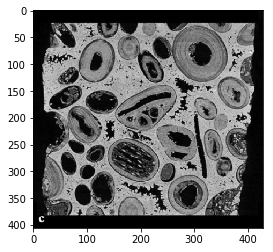

In [2]:
#read image
image = cv2.imread('CT scanned sample - (c).png')
plt.imshow(image)

In [3]:
#convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

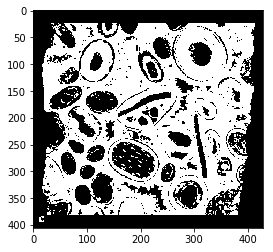

In [4]:
# used OTSU threshold to isolate the pores from the image. It assumes two classes of pixel and
# on the basis of bi-modal histogram converts the grayscale image into binary image.
ret, threh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
plt.imshow(threh,cmap='gray')

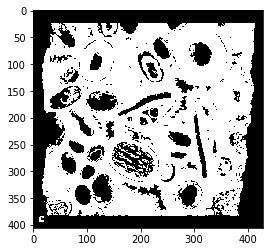

In [5]:
ret, threh = cv2.threshold(gray, 50,255,cv2.THRESH_BINARY)
plt.imshow(threh,cmap='gray')

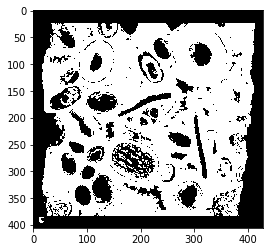

In [11]:

opening = cv2.morphologyEx(threh, cv2.MORPH_OPEN, (5,5))
plt.imshow(opening, cmap='gray')

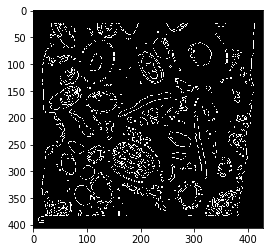

In [12]:
canny = cv2.Canny(opening,255,255)
plt.imshow(canny,cmap='gray' )

In [13]:
im2, contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

1064

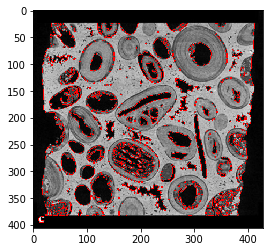

In [14]:
i = image.copy()
for cnt in contours:
    cv2.drawContours(i, contours, -1, (255,0,0),-1)

plt.imshow(i)

In [15]:
j = measure.label(i)

In [16]:
k = measure.regionprops(j)

for e in range(len(k)):
    print(k[e]['area'])

18
6
51
6
3
81
12
18
3
3
6
3
3
6
6
9
6
24
18
15
6
12
3
21
6
6
3
12
18
3
6
3
33
12
6
27
6
6
27
6
3
3
12
6
6
9
6
42
6
6
6
3
3
3
3
6
42
3
9
6
6
42
6
9
9
12
3
6
6
15
3
6
6
12
39
27
18
3
12
6
9
18
3
9
6
12
3
3
3
45
24
3
3
6
6
3
6
90
3
3
3
6
3
9
12
15
24
3
3
27
6
24
51
6
90
18
24
3
21
228
54
3
6
174
3
63
39
3
93
9
3
12
45
12
6
3
3
3
18
75
15
54
24
12
24
12
9
30
12
90
9
30
6
3
39
9
9
3
18
3
12
3
3
27
30
3
42
3
9
27
6
15
3
6
15
3
3
9
42
9
3
3
6
21
6
6
6
3
12
90
33
3
18
39
39
33
24
6
3
12
33
3
3
12
15
3
6
9
3
48
3
30
6
15
9
6
3
60
3
30
3
24
15
18
15
42
9
33
3
18
3
6
15
6
6
21
6
27
48
48
3
36
6
3
45
3
9
45
12
12
165
3
6
3
3
3
3
3
3
3
3
3
3
3
30
3
3
6
9
12
3
3
3
9
3
3
15
3
9
3
3
3
3
3
9
15
9
3
15
3
21
18
3
6
3
3
6
9
9
3
3
3
3
6
9
6
9
33
9
3
9
12
18
3
3
3
3
3
3
12
3
3
6
3
3
3
21
9
9
3
6
3
6
12
9
3
6
15
6
9
9
3
3
3
9
3
6
3
3
3
9
18
3
3
3
6
3
6
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
15
3
6
3
3
3
3
6
15
6
3
3
3
6
6
9
3
6
6
3
3
3
3
9
3
3
3
3
6
3
9
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
12
12
6
3
3
3
3
3
3
3

3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
18
15
6
6
3
3
9
12
12
3
15
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
6
3
3
3
3
3
6
3
3
3
6
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
6
15
9
3
3
3
9
3
3
3
3
3
3
12
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
9
3
3
15
3
6
3
3
3
3
3
3
3
3
3
3
3
18
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
12
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
15
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
18
3
3
3
3
3
12
3
9
3
6
3
6
9
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
6
3
9
3
12
3
3
3
6
3
9
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
6
9
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
9
3
9
3
3
12
3
3
3
3
3
6
3
3
3
3
3
3
3

6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
9
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
6
3
3
3
3
3
9
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
12
3
6
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
6
3
9
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
15
6
3
6
3
84
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
15
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
6
3
6
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
77
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
6
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3

3
3
3
6
3
18
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
6
3
6
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
15
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
6
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
18
9
3
15
6
6
3
6
18
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
6
3
6
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
6
3
6
6
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
15
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
6
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
21
6
33
9
3
6
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
12
9
3
15
9
9
12
6
3
27
9
3
33
96
15
12
15
3
3
3
3
12
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3


3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
39
3
15
3
9
24
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
6
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
9
3
12
3
3
3
3
3
3
3
3
3
3
3
9
6
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
12
3
12
6
6
18
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
6
9
6
3
6
6
9
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
6
6
12
3
9
3
3
3
3
3
3
3
3
3
3
3
12
6
3
9
21
3
12
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
130
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
6
3
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
6
3
3
6
41
3
3
3


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
6
3
3
6
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
12
3
9
6
6
6
3
3
3
3
3
15
3
3
6
3
6
3
6
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
21
42
9
6
9
6
12
3
3
3
3
6
3
3
3
10
3
3
3
3
3
6
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
6
3
6
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
6
3
3
3
3
12
3
3
6
3
3
3
3
6
3
3
3
12
9
12
6
3
3
3
12
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
6
3
3
9
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
9
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
18
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
12
9
3
3
3
3
3
3
3
3
3
6
3
6
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
15
3
3
3
6
3
9
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
39
3
3
3
9
3
12
3
6
18
3
3
3
3
9
3
3
3
6
3
3
9
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
9
3
6
3
3
3
3
18
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
6
3
6
3
3
12
3
3
3
3
6
3
3
6
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
72
3
24
6
9
3
3
3
3
6
24
6
3
3
3
3
3
6
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
9
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
9
3
3
3
3
3
6
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
9
3
3
3
3
3
3
3
6
9
3
3
3
3
3
3
3
6
6
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
9
3
6
3
3
9
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
6
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
6
6
3
6
3
3
12
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
9
3
3
3
3
3
3
3
3
9
3
3
9
3
3
30
6
9
3
6
3
33
9
9
3
3
3
3
3
3
3
3
3
6
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
9
9
12
9
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3


3
12
3
3
6
18
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
5
3
3
8
3
3
3
3
3
3
3
6
6
3
3
3
18
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
9
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
6
9
6
3
3
9
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
6
12
6
6
3
9
6
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
18
6
3
3
3
3
3
3
3
3
3
12
3
6
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
18
3
9
36
6
60
3
3
3
6
12
3
9
6
3
15
3
3
3
3
3
3
3
3
3
3
6
3
6
6
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
22
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
9
3
3
6
3
3
3
3
3
3
3
3
6
6
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
6
3
6
3
6
6
3
3

3
3
3
3
3
3
3
3
3
3
3
6
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
6
3
6
3
3
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
9
3
3
9
3
3
3
6
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
12
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
3
42
3
6
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
15
18
3
3
3
3
3
3
6
3
21
6
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
6
3
3
9
3
9
6
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
15
6
3
3
12
9
3
3
9
3
6
3
3
3
3
3
3
3
9
3
9
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
6
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
12
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
6


3
6
3
3
3
3
6
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
6
6
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
9
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
9
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
9
3
12
3
9
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
9
3
6
9
3
3
6
27
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
12
3
6
9
3
24
3
3
3
3
3
3
9
9
12
3
15
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
8
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
6
3
6
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
3
3
6
3
3
3
3
3
3
3
3
12
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
21
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
9
3
3
3
3
6
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
6
6
6
6
9
9
3
3
3
3
3
3
6
9
6
3
6
3
3
3
3
3
3
6
3
3
3
6
3
3
6
3
3
3
3
3
9
3
6
12
12
27
42
9
3
3
3
30
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
12
6
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6


6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
7
3
3
3
3
6
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
6
3
3
3
3
3
3
6
3
3
9
6
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
9
24
6
6
9
3
3
15
3
3
18
3
42
6
45
9
6
6
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
21
15
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
3
3
3
3
3
6
3
3
3
49
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
9
3
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
12
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
17
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
36
3
12
9
3
12
6


3
3
3
3
9
3
3
3
3
3
3
6
3
3
3
3
3
3
16
3
3
6
3
3
3
3
3
21
3
6
3
9
18
3
27
18
15
15
12
9
3
3
42
3
6
6
3
3
3
6
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
9
3
3
3
3
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
12
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
3
27
6
3
12
3
51
6
3
6
6
9
39
18
12
18
3
3
3
3
3
3
3
24
3
6
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
6
3
3
3
6
6
3
3
6
12
3
6
9
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
83
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


3
3
6
3
3
3
3
3
3
6
3
3
6
3
3
6
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
12
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
6
6
3
15
3
3
12
6
3
3
6
27
3
3
3
6
3
6
3
6
3
3
3
3
3
3
6
3
6
3
3
6
6
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
9
3
6
3
3
3
3
15
6
3
3
3
3
3
6
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
3
3
18
12
6
3
36
42
3
3
6
24
3
6
24
3
9
6
9
15
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
9
3
3
3
3
3
3
3
3
3
3
3
3
6
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
3
3
3
6
3
3
6
3
3
3
3
3
3
3
6
3
3
6
9
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
30
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
6
3
3
3
6
3
3
3
5
3
3
6
3
3
3
6
54
6
6
3
6
6
9
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
6
3
3
3
9
6
3
3
6
6
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3

3
6
3
3
3
6
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
6
3
3
3
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
1
3
6
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
15
3
9
3
33
15
6
3
3
6
33
3
3
6
12
6
3
9
6
3
9
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
9
3
3
12
6
9
3
3
24
3
3
3
3
3
3
3
3
12
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
21
3
3
3
3
3
3
3
3
3
9
3
3
3
3
6
3
6
3
3
3
6
6
3
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
9
3
3
3
3
3
3
3
3
6
3
3
3
3
6
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
9
3
3
3
6
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3

3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
9
6
3
6
3
6
3
3
3
3
3
3
6
6
9
3
3
12
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
9
3
3
6
3
3
3
6
3
3
3
3
3
3
6
6
3
3
3
3
9
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
15
18
12
18
3
3
3
3
18
3
30
3
3
3
15
6
3
3
6
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
6
3
3
12
3
3
3
3
3
6
3
7
6
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
1
3
3
9
15
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
6
15
3
3
21
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
12
3
3
3
3
27
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
6
6
6
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
30
18
6
3
3
3
6
6
3


3
3
3
3
3
3
3
2
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
6
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
9
3
3
3
9
3
3
3
3
6
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
9
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
6
9
3
3
3
6
3
6
3
3
3
3
3
3
6
3
13
3
3
6
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
12
30
3
9
3
6
15
3
18
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
15
3
3
3
3
3
6
3
6
15
9
3
18
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
9
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
22
3
6
3
3
3
3
3
3
6
3
3
3
3
2
3
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
106
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
9
3
15
3
3
3
3
3
3
3
3
3
12
3
6
3
3
3
3
3
12
3
3
3
3
3
3
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
6
9
3
6
3
3
3
3


6
3
27
3
3
3
15
3
45
6
9
18
15
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
6
3
3
3
3
3
5
3
3
3
3
3
3
3
3
24
3
9
6
15
3
3
3
6
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
3
6
6
3
6
3
3
3
3
3
3
3
1
6
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
8
3
6
3
3
3
3
3
3
3
6
6
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
15
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
6
9
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
27
6
9
3
3
6
15
12
30
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
6
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
9
3
6
3
3
6
3
3
6
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
10
3
1
3
3
3
3
3
3
3
3
3
3
3
3
10
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
15
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
12
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
1
3
46
3
3
15
3
3
3
45
3
3
3
15
3
3
3
9
9
15
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
9
3
15
3
3
3
12
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
7
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
9
3
3
3
6
3
3
3
3
3
3
14
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
12
6
3
3

3
3
3
3
3
6
3
3
3
12
3
6
3
3
3
3
12
3
6
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
10
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
18
3
3
6
81
6
6
3
6
102
6
3
9
45
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
8
3
3
3
3
3
3
3
3
3
3
3
3
6
12
3
3
3
3
3
12
3
9
3
6
3
3
3
3
3
3
3
3
6
3
3
3
9
3
6
3
3
9
21
24
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
3
3
3
15
6
3
6
3
6
3
3
6
3
3
3
3
3
3
6
9
6
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
6
3
3
3
6
3
3
6
3
1
3
3
3
3
3
3
3
3
3
12
6
12
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
3
3
3
3
3
9
3
24
6
3
3
3
9
3
12
3
6
3
3
12
39
12
6
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
12
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
12
9
3
30
3
3
6
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
6
3
3
27
3
6
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
6
3
6
3
3


6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
6
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
12
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
9
3
3
3
3
3
3
27
3
3
3
3
9
6
12
3
12
3
3
3
3
3
3
3
3
3
3
4
3
3
6
6
6
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
21
6
6
45
3
3
6
9
6
3
27
3
9
3
6
3
3
3
6
3
3
9
3
3
3
3
3
6
3
3
3
3
3
3
15
3
1
6
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
6
6
6
3
3
3
6
3
3
3
3
3
3
20
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
6
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
6
3
6
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
9
3
9
3
3
3
3
15
3
6
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
24
3
3
3
3
3
3
3
6
3
3
3
3
3
3
6
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
6
3
3

3
6
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
9
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
6
3
3
3
3
3
3
3
9
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
9
3
3
3
3
3
6
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
6
6
3
3
3
6
3
3
3
6
12
3
6
3
3
3
3
3
3
3
3
3
6
6
6
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
8
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
24
9
33
3
6
15
6
12
3
21
9
6
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
65
3
6
6
3
3
3
3
3
3
6
3
3
3
3
3
6
3
3
9
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
6
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
9
12
3
6
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
6
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
3
3
3
3
3
6
3
3
3
3
3
